<a href="https://colab.research.google.com/github/fikrinotes/PowerfulPython/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('google-playstore-app-preference')
jovian.set_colab_id('1oy7CvUdxrDmshN8r5JzeEpLQ7mIt5gqn')

<center>

 # Exploratory Analysis on Google Playstore Apps 
 
 </center>
 
![image](https://play.google.com/about/howplayworks/static/assets/social/share_google_play_logo.png)

## Introduction 

Nowadays, almost everyone uses a smartphone. As an App Store, Google Play Store tends to be the main market for smartphone's app. Now, Google Play Store hosts more than 3.5 million Android Apps, and 98% of the apps are free to download and install. because of that, it would be interesting to do some analysis on Google Play Store dataset. In this project, we will analyze some feature of this data to gain insightful information about the app on Google Play Store. 

### About the dataset
This dataset is scrapped from Google Play Store. This dataset consist of 10841 rows and 13 columns. The columns of this dataset include :

#### 1. `App`
This column consist of the name of app on Google Play Store.

#### 2. `Category`
This column consist of the categories the app belongs to. For example, the app "Subway Surfers" is on the `GAMES` category.

#### 3. `Rating`
This column consist of the rating of each app in the `App` column. the values of this column ranges between 0 up to 5.

#### 4. `Reviews`
This column describe the number of users review for the app (as when scrapped).

#### 5. `Size`
This column describe size of the app (as when scrapped).

#### 6. `Installs`
This column describe the number of users downloads/installs for the app (as when scrapped).

#### 7. `Type`
This column describe whether the app is free or paid.

#### 8. `Price`
This column describe the price of the app (as when scrapped). if the app is free, then price = 0.

#### 9. `Content Rating`
This column describe the age group the app is targeted at, such as childer, teen, adult, etc.

#### 10. `Genres`
This column describe the genres of the app. For example, a games app can have genre such as adventure, arcade, etc. One app can belongs to multiple genre.

#### 11. `Last Update`
This column shows when the app last updated (as when scrapped).

#### 12. `Current Ver` 
This column shows the current version of the app ( as when scrapped).

#### 13. `Android Ver`
This column specify the minimum android version required to install/use the app properly (as when scrapped).



### About This Project
This Exploratory Data Analysis project is part of *Data Analysis With Python : Zero to Pandas* course, a course provided by [Jovian.ai](https://jovian.ai). In this project, we will analyze some feature of Google Play Store to gain useful information of the dataset such as spread of categories of Apps on Google Play, determine the most popular apps, users satifaction with the app, 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

This dataset is retrieved from kaggle dataset : https://www.kaggle.com/lava18/google-play-store-apps

There are several ways to download the dataset into jupyter notebook :
* download the dataset manually on kaggle and upload it to jupyter 
* download dataset in csv raw format using urlretrieve from urllib package (we will use this method now)
* download using opendatasets package

Let's begin by downloading the data, and listing the files within the dataset. As i said before, i use the dataset provided by kaggle. i have download the dataset and upload it into [my github repository](https://github.com/fikrinotes/kaggle-datasets) such that we can retrieve it using `urllib.request` library.

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/fikrinotes/kaggle-datasets/main/googleplaystore/googleplaystore.csv' 

In [ ]:
from urllib.request import urlretrieve as download
download(dataset_url, "googleplaystore.csv")

('googleplaystore.csv', <http.client.HTTPMessage at 0x7f592c390a00>)

The dataset has been downloaded and extracted. to check if the dataset exist, we can use `listdir()` provided by `os` library.

In [ ]:
import os
os.listdir()

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 '.cache',
 '.jupyter',
 'googleplaystore.csv',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.jovianrc',
 'zerotopandas-course-project.ipynb',
 '.git',
 'work',
 '.npm']

From the text above, we can see that the dataset -- `googleplaystore.csv` -- has been downloaded to jupyter notebook. Let us save and upload our work to Jovian before continuing.

## Save Our Notebook

In [ ]:
project_name = "google-playstore-app-preference" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fikrinotes/google-playstore-app-preference" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/fikrinotes/google-playstore-app-preference


'https://jovian.ai/fikrinotes/google-playstore-app-preference'

## Data Preprocessing

Before analyzing the datasets, we should import the datasets using pandas library. We have `googleplaystore.csv` datasets in csv format and store it to `playstore_raw_df`. then, we will do data preprocessing i.e cleaning and formatting the data. data preprocessing in this analysis include change the data type of each columns, drop/replace invalid data, etc.

#### Standard Library 
for this exploratory analysis, we will use pandas library to handling tabular data, and numpy to handle any mathematical operation in this analysis. so, let's import these library.

In [ ]:
import pandas as pd
import numpy as np

let's read the data using `pd.read_csv()` method provided by pandas

In [ ]:
playstore_raw_df = pd.read_csv("googleplaystore.csv")

In [ ]:
playstore_raw_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Convert The data Type of Some Column

First, let's check the type of each columns in our datasets. checking the datatype of each columns in dataset help us to know which column(s) have incorrect data type.

In [ ]:
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


from the info above, we can see that the data type of some column was incorrect. for example, the data type of , `Reviews`, `Size` and `Installs` columns should be `float64` or `int64` instead of `object`. let's convert the data type of each column in this dataset using `dataframe.astype()` method. we will convert the data type of `"Reviews"` column first. The general way to convert data type of a column in pandas is to use `astype()` method. 

#### The column of `Reviews`

When we are trying to convert its data type to float, the error will appears (you can try it). this error shows that there is a string `'3.0M'` such that we cannot convert its data type to float. So, the first thing we need to do is delete the row that contains `'3.0M'` string. and then, convert its data type to float.

In [ ]:
playstore_raw_df.drop(playstore_raw_df["Reviews"][playstore_raw_df["Reviews"] == '3.0M'].index, axis=0, inplace=True)

In [ ]:
playstore_raw_df["Reviews"][playstore_raw_df["Reviews"] == '3.0M']

Series([], Name: Reviews, dtype: object)

In [ ]:
playstore_raw_df["Reviews"] = playstore_raw_df["Reviews"].astype("float64")
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


#### The column of `size`

Next, we will convert the data type of `"Size"` column. but, since this column contain string such as `"varies with device"` and `M`&`k` suffix, we should handle this problem first. for `"Varies with device"` string, we could replace it to `np.nan`, a NaN value. 

In [ ]:
playstore_raw_df["Size"].replace("Varies with device", 0, inplace=True)

we are done for `"Varies with device"` string. now we will handle the suffix in this column. each string of this column ended with 'M' or 'k', which is a conversion factor. 'M' stands for mega ($10^6$) and 'k' stands for kilo($10^3$)

In [ ]:
if playstore_raw_df["Size"].dtype == "object":
    playstore_raw_df["Size"] = playstore_raw_df["Size"].str.replace("M", "e+6").str.replace("k", "e+3",True)
playstore_raw_df["Size"] = playstore_raw_df["Size"].astype("float64")

In [ ]:
playstore_raw_df.columns
if "Size" in playstore_raw_df.columns:
    playstore_raw_df.rename(columns = {"Size":"Size (in Byte)"}, inplace=True)

In [ ]:
playstore_raw_df.head()

,App,Category,Rating,Reviews,Size (in Byte),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### The column of `Installs`

The next thing we need to do is change the data type of `Installs` column to integer

In [ ]:
if playstore_raw_df["Installs"].dtype != "int" or playstore_raw_df["Installs"].dtype != "int64":
    playstore_raw_df["Installs"] = playstore_raw_df["Installs"].str.strip("+")
    playstore_raw_df["Installs"] = playstore_raw_df["Installs"].str.replace(",", "")

In [ ]:
playstore_raw_df["Installs"] = playstore_raw_df["Installs"].astype("int")

In [ ]:
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size (in Byte)  9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


#### The column of `Price`

We all know that price must be a number. So, we should convert the data type of "price" column to float. string in the `Price` column contain character `$`. in order to delete this character, we will use `strip()` method. 

In [ ]:
if playstore_raw_df["Price"].dtype != "float" or  playstore_raw_df["Price"].dtype != "float64":
    playstore_raw_df["Price"] = playstore_raw_df["Price"].str.strip("$")
    playstore_raw_df["Price"] = playstore_raw_df["Price"].astype("float")

#### The column of `type`
this column indicate whether the apps provide by Google Play Store is Free or Paid. there are only 2 values here. so, it is better to convert the data type of this column to `True` or `False`. `True` for free, and `False` for paid.

In [ ]:
playstore_raw_df["Type"] = playstore_raw_df["Type"].replace("Free", True).replace("Paid", False).astype("bool")

In [ ]:
try:
    playstore_raw_df.rename(columns={"Type":"is_free"}, inplace=True)
except:
    print("the column's label has already changed")

In [ ]:
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size (in Byte)  9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   is_free         10840 non-null  bool   
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


### Handle Date With `pd.to_datetime()` Method

In [ ]:
playstore_raw_df["Last Updated"] = pd.to_datetime(playstore_raw_df["Last Updated"])

In [ ]:
playstore_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size (in Byte)  9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   is_free         10840 non-null  bool          
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 1.1+ MB


### Sample Data
We have prepared and cleaned our dataset. For now, let's take a look to the sample of our data.

In [ ]:
playstore_raw_df.sample(6)

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10162,EZ Screenshot,TOOLS,4.4,55.0,1400000.0,5000,True,0.0,Everyone,Tools,2017-09-12,1.1.4,5.0 and up
10635,"The Ledger - Lakeland, Florida",NEWS_AND_MAGAZINES,4.6,89.0,5700000.0,5000,True,0.0,Everyone,News & Magazines,2018-02-17,5.0,4.4 and up
4436,Google I/O 2018,BOOKS_AND_REFERENCE,4.3,22401.0,4600000.0,500000,True,0.0,Everyone,Books & Reference,2018-05-07,6.1.2,5.0 and up
6177,BLOOD & GLORY: IMMORTALS,GAME,4.3,101762.0,11000000.0,1000000,True,0.0,Teen,Action,2015-06-11,2.0.0,3.0 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2.0,33000000.0,100,True,0.0,Everyone,Medical,2018-07-02,2.0.1,4.1 and up
8660,"Clean My House – Chore To Do List, Task Scheduler",PRODUCTIVITY,4.1,661.0,3400000.0,100000,True,0.0,Everyone,Productivity,2018-06-21,2.1.2,4.1 and up


In [ ]:
# run this code to save this notebook
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fikrinotes/google-playstore-app-preference" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/fikrinotes/google-playstore-app-preference


'https://jovian.ai/fikrinotes/google-playstore-app-preference'

## Exploratory Analysis and Visualization

Data visualization is one of the most important parts of Data Analysis. By visualizing the data, we can infer some relationships between its features and help us understand the distribution of the data. 

To visualize the data, we need the library for data visualization, such as matplotlib and seaborn. so, let's import matplotlib and seaborn library.



Let's begin by copy the `playstore_raw_df` to a new variable `playstore`, ince we don't want to change the `playstore_raw_df` anymore. after that, we should import `matplotlib.pyplot` and `seaborn` library to visualize the data that we have. 

In [ ]:
playstore = playstore_raw_df.copy()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
playstore.tail(8)

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619000.0,1000,True,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2600000.0,500,True,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0.0,9600000.0,10,True,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,True,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100,True,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500000.0,1000,True,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,True,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19000000.0,10000000,True,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


### Apps Category
Let's take a look at the category distribution of each app on the Google Play Store. First, it's good to know all the categories of apps that are in the Google Play Store. to get a list of application categories in this dataset, we can use the `unique()` method. this method will return all unique values of the given column.

In [ ]:
playstore["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

then, we want to know many apps that fall into a certain category. we can use count plot to create a diagram that shows the distribution of apps with respect to each category.

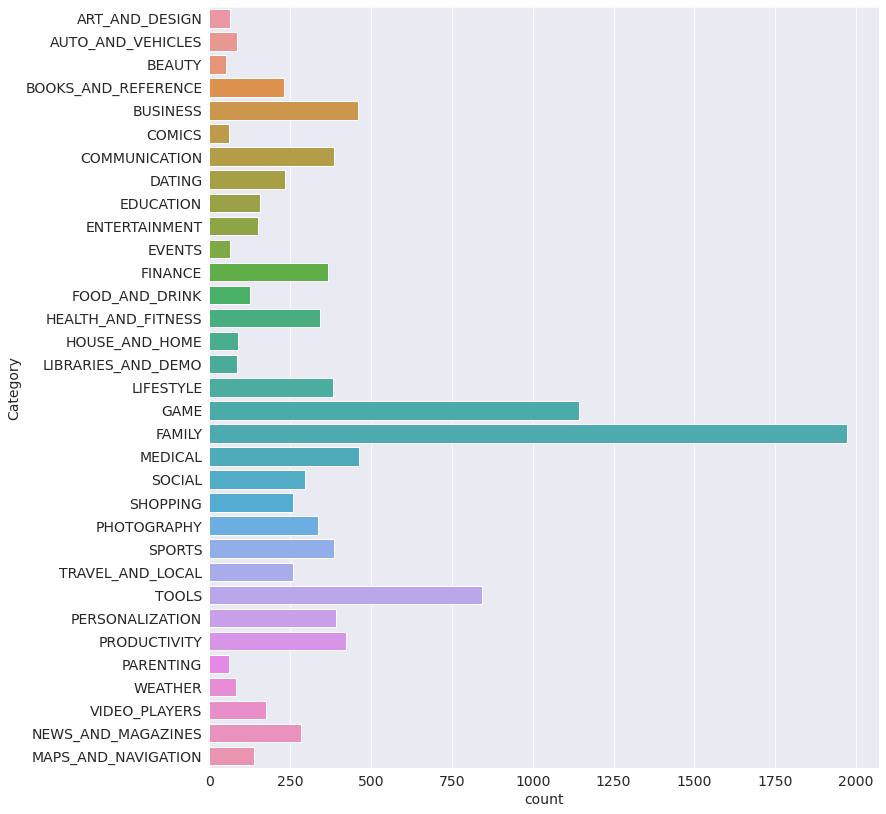

In [ ]:
plt.figure(figsize=(12,14))
sns.countplot(y=playstore["Category"]);

from the count plot above, we can see that most of the app in google play are in `family` category. there are almost 2000 apps with `Family` category in Google Play Store. When we take a look at the dataframe again, we will notice that the `family` category cover so many genres, such as education, entertainment, etc. So, it is obvious that most of the app in Google Play Store are in `family` category.

### Free App VS Paid App

In [ ]:
free_count = playstore["is_free"].value_counts()
free_count

True     10040
False      800
Name: is_free, dtype: int64

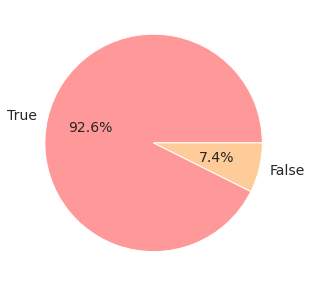

In [ ]:
plt.pie(free_count, labels=free_count.index, autopct='%.1f%%', colors = ['#ff9999','#ffcc99']);

There are only 7.4% paid apps in the google play store. This number is very small compared to the percentage of free apps in google play store. this might happen becaause most of the people is still prefer free app.

In [ ]:
playstore.is_free[playstore.is_free==False].count()

800

### Distribution of App's Rating 
when analyzing this dataset, it is a good thing to know the distribution of Rating in this dataset.

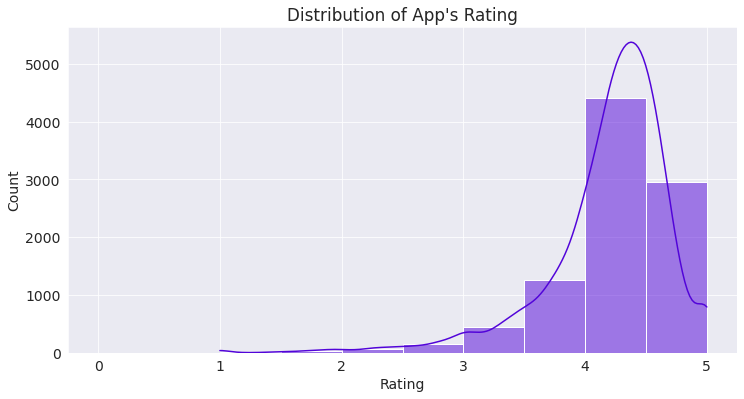

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x="Rating", data=playstore, kde=True, bins=np.arange(0,5.5, 0.5), color='#5204d9');
plt.title("Distribution of App's Rating");

from the bar plot above, we can see that most of the rating lies between 4 and 4,5. It looks like most of the google play store users satisfy with the apps in google play store.

### Rating VS Installs


In [ ]:
game_data = playstore[playstore["Category"]=="GAME"]
game_data

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67000000.0,100000000,True,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76000000.0,1000000000,True,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74000000.0,500000000,True,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23000000.0,10000000,True,0.0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46000000.0,10000000,True,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287.0,38000000.0,50000,True,0.0,Everyone,Word,2013-12-18,1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16000000.0,1000000,True,0.0,Everyone,Trivia,2018-05-24,1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510.0,78000000.0,500000,True,0.0,Teen,Card,2018-08-01,2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81000000.0,1000000,True,0.0,Teen,Action,2018-08-07,1.5.447,4.0 and up


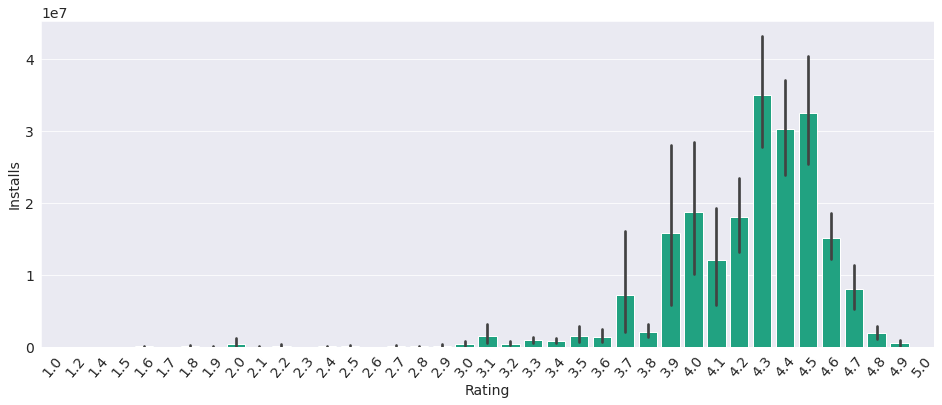

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x="Rating", y="Installs", data=playstore, color="#0bb88c")
plt.xticks(rotation=50);

based on the diagram above, we know that in general, most of people install the high rating's apps. the most installed apps is the apps with  4,3 rating. the black line in the diagram above represent the variation of installs value. let's take 4,3 rated apps as an example. for this type of app, the black line shows "how many times has this app been installed". so, there are 4,3 rated app that has been installed nearly $2,8*10^7$ times, there are also 4,3 rated app that has been installed $4*10^7$ times (take a look at the black line).

### The Distribution of App's Price

In order to know the price distribution, we should filter the `playstore` dataset first such that we get only the paid apps.

In [ ]:
paid_app = playstore[playstore["is_free"] == False]
paid_app

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,False,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,False,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,False,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,False,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000,False,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17.0,157000.0,100,False,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2400000.0,1000,False,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252.0,11000000.0,10000,False,16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405.0,9500000.0,10000,False,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up


Then, we can create a box plot that represent the distribution of the price. we pass `paid_app["Price"]` as the argument to the `sns.boxplot()` method. The argument`paid_app["Price"]` itself is a series of app's price.

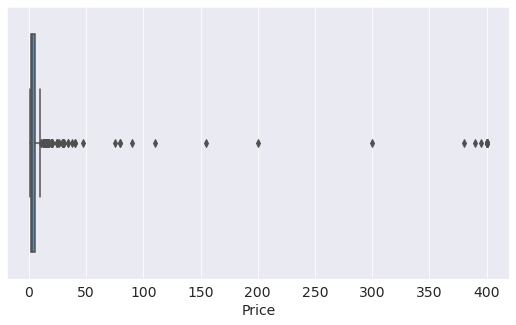

In [ ]:
sns.boxplot(x=paid_app["Price"], color="#2999e3");

In [ ]:
desc = paid_app.describe()
q1 = desc.loc['25%']['Price']
q3 = desc.loc['75%']['Price']
iqr = q3-q1     
lowerlimit = q1-1.5*iqr
upperlimit = q3+1.5*iqr
print("price of most of the paid apps in google play store lies between ${} and ${}. but, there are also the outliers, reach the price $400.".format(q1, q3))

price of most of the paid apps in google play store lies between $1.49 and $4.99. but, there are also the outliers, reach the price $400.


from the box plot above, we know that the interquartile range of app's price is very small. the interquartile range of the price is about 3,5.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fikrinotes/google-playstore-app-preference" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/fikrinotes/google-playstore-app-preference


'https://jovian.ai/fikrinotes/google-playstore-app-preference'

## Data Exploration
So far, we have visualize and get some basic information about our dataset. Now, let's ask some question and answer it based on our dataset.

#### Q1: What is the most installed games in Google Play Store?

In order to obtain the most installed game in Google Play Store, we should extracted the list of games in the `playstore` data frame. we can do this by searching all of the apps that have "GAMES" category.

In [ ]:
games_list = playstore[playstore["Category"] == "GAME"]
games_list

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67000000.0,100000000,True,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76000000.0,1000000000,True,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74000000.0,500000000,True,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23000000.0,10000000,True,0.0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46000000.0,10000000,True,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287.0,38000000.0,50000,True,0.0,Everyone,Word,2013-12-18,1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16000000.0,1000000,True,0.0,Everyone,Trivia,2018-05-24,1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510.0,78000000.0,500000,True,0.0,Teen,Card,2018-08-01,2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81000000.0,1000000,True,0.0,Teen,Action,2018-08-07,1.5.447,4.0 and up


the idea to find the most installed game is sorting all of the apps based on `Installs` column. There are 2 option to answer this question :
* Sort the game based on `Installs` in descending order. after that, we just take the first row of this data frame to get the name of the most installed games in Google Play Store.

* Sort the game based on `Installs` in ascending order. after that, we just take the last row of this data frame to get the most installed games in Google Play Store.

let's used the first option. since `sort_values()` method only have `ascending` argument to determine what type of sorting that we want, we can type `ascending=False` to sort the game list in descending order. 

In [ ]:
sorted_list_game = games_list.sort_values("Installs", ascending=False)
sorted_list_game.iloc[0]

App                    Subway Surfers
Category                         GAME
Rating                            4.5
Reviews                    27724094.0
Size (in Byte)             76000000.0
Installs                   1000000000
is_free                          True
Price                             0.0
Content Rating           Everyone 10+
Genres                         Arcade
Last Updated      2018-07-12 00:00:00
Current Ver                    1.90.0
Android Ver                4.1 and up
Name: 1750, dtype: object

In [ ]:
print("the most installed game in google play store is {}. This game has been installed {}+ times!".format(sorted_list_game.iloc[0]["App"], sorted_list_game.iloc[0]["Installs"]))

the most installed game in google play store is Subway Surfers. This game has been installed 1000000000+ times!


#### Q2: Which app is more satisfying for users for art and design? free apps or paid apps?

The dataset feature that we can use to determine user satisfaction is Rating. Highly rated apps are more likely to be more satisfying apps. In order to know which type of apps is more satisfying, we can compare the rating average of each type of app.

In [ ]:
art_design = playstore[playstore["Category"] ==  "ART_AND_DESIGN"]
free_art_design = art_design[art_design["is_free"] == True]
paid_art_design = art_design[art_design["is_free"] == False]

In [ ]:
avg_free_art_design = free_art_design["Rating"].mean()
avg_paid_art_design = paid_art_design["Rating"].mean()

In [ ]:
print("Average rating of free apps for art and design is {:.2f} and average rating of paid apps for art and design is {:.2f}. So, based on its rating, paid apps are more satisfying for user.".format(avg_free_art_design, avg_paid_art_design))

Average rating of free apps for art and design is 4.34 and average rating of paid apps for art and design is 4.73. So, based on its rating, paid apps are more satisfying for user.


#### Q3: Which paid app get the highest number of earning?

lets filter the `playstore` dataset to retrieve the data of paid apps only. 

In [ ]:
paid_app = playstore[playstore["is_free"] == False]
paid_app

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,False,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,False,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,False,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,False,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000,False,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17.0,157000.0,100,False,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2400000.0,1000,False,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252.0,11000000.0,10000,False,16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405.0,9500000.0,10000,False,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up


lets assume that there is no tax and other expenditure. So, the total earning for each app is the number of installs times the price of that app. 

In [ ]:
earning = paid_app["Installs"] * paid_app["Price"]
high_earning = paid_app[earning == earning.max()]
high_earning

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2241,Minecraft,FAMILY,4.5,2376564.0,NaN,10000000,False,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device
4347,Minecraft,FAMILY,4.5,2375336.0,NaN,10000000,False,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device


In [ ]:
earn_str = "The highest earning app on Google Play Store is {}. This app earned around ${} until this dataset retrieved."
print(earn_str.format(high_earning["App"].iloc[0], earning.max()))

The highest earning app on Google Play Store is Minecraft. This app earned around $69900000.0 until this dataset retrieved.


#### Q4: What are the top 3 categories in Google Play Store?

let's visualize the distribution of apps based on it's categories in Google Play Store. to visualize the distribution of each category, we can use `countplot()` method provided by seaborn library (sns). 

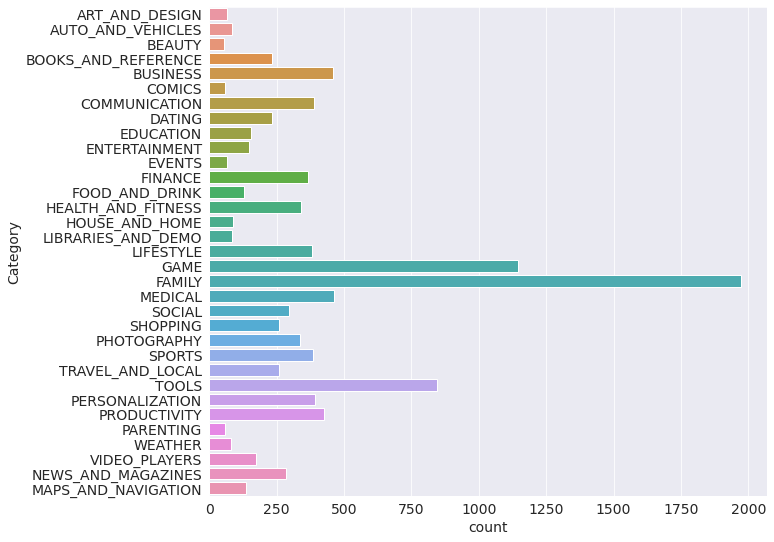

In [ ]:
plt.figure(figsize=(10,9))
sns.countplot(y=playstore["Category"]);

Now, we know that the most dominant category is `FAMILY`. To get the top 3 categories in google play store, we can use the  percentage of the number of apps in each category. to do this, we will use `value_counts()` method to create a pandas series that contain the number of apps in each categories.

In [ ]:
count_percentage = (playstore["Category"].value_counts()*100/len(playstore["Category"])).to_frame()

In [ ]:
top3 = """
The top 3 categories in Google Play Store :
1. {}, {:.2f}% of the apps on Google Play Store are apps in the {} category
2. {}, {:.2f}% of the apps on Google Play Store are apps in the {} category
3. {}, {:.2f}% of the apps on Google Play Store are apps in the {} category
""".format(count_percentage.index[0].lower(), count_percentage.Category[0], count_percentage.index[0].lower(), count_percentage.index[1].lower(), count_percentage.Category[1], count_percentage.index[1].lower(), count_percentage.index[2].lower(), count_percentage.Category[2], count_percentage.index[2].lower())
print(top3)


The top 3 categories in Google Play Store :
1. family, 18.19% of the apps on Google Play Store are apps in the family category
2. game, 10.55% of the apps on Google Play Store are apps in the game category
3. tools, 7.78% of the apps on Google Play Store are apps in the tools category



#### Q5: What is the most popular social app  for teens ?

In [ ]:
teen_social = playstore[(playstore["Category"] == "SOCIAL") & (playstore["Content Rating"] == "Teen")]
teen_social.sort_values("Installs", ascending=False)

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,True,0.00,Teen,Social,2018-08-03,Varies with device,Varies with device
4144,Google+,SOCIAL,4.2,4828372.0,NaN,1000000000,True,0.00,Teen,Social,2018-07-26,Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,NaN,1000000000,True,0.00,Teen,Social,2018-07-31,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,1000000000,True,0.00,Teen,Social,2018-07-31,Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1000000000,True,0.00,Teen,Social,2018-08-03,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,Otto DM,SOCIAL,NaN,0.0,2400000.0,10,True,0.00,Teen,Social,2018-03-07,1.0,4.0 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200000.0,10,True,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
6257,BH Connect,SOCIAL,NaN,0.0,32000000.0,1,True,0.00,Teen,Social,2018-03-22,1.4.4,4.0.3 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0.0,8700000.0,0,False,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up


In [ ]:
print("one of the most popular social app for teens is {}. this app has been installed about {}+ times!".format(teen_social["App"].iloc[0], teen_social["Installs"].iloc[0]))

one of the most popular social app for teens is Facebook. this app has been installed about 1000000000+ times!


#### Q6 : Which type of scanner app do users prefer? free app or paid app?

in order to answer this question, we should create a dataframe called `business` that contain all of the apps in `business` category. then, extract this dataframe to get a new dataframe called `scanner` that contain the data of all scanner apps.

In [ ]:
business = playstore[(playstore["Category"] == "BUSINESS")]
business

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129.0,NaN,10000000,True,0.0,Everyone,Business,2018-07-30,Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730.0,NaN,50000000,True,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730.0,NaN,10000000,True,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185.0,29000000.0,5000000,True,0.0,Everyone,Business,2018-07-17,3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584.0,NaN,1000000,True,0.0,Everyone,Business,2018-05-04,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,FQ Load Board for Transporters,BUSINESS,NaN,0.0,3900000.0,100,True,0.0,Everyone,Business,2018-02-16,1.1.3,5.0 and up
10810,Fr Lupupa Sermons,BUSINESS,4.8,19.0,21000000.0,100,True,0.0,Everyone,Business,2018-06-12,1.0,4.4 and up
10813,DICT.fr Mobile,BUSINESS,NaN,20.0,2700000.0,10000,True,0.0,Everyone,Business,2018-07-17,2.1.10,4.1 and up
10816,FieldBi FR Offline,BUSINESS,NaN,2.0,6800000.0,100,True,0.0,Everyone,Business,2018-08-06,2.1.8,4.1 and up


here, we will using regular expression to get the list of index of app that **isn't a scanner app**. let's call this list `index`. because we want to search the name of apps that contain `scan`, then we will using `"scan"` string as regex pattern. then, iterate through each name of apps, and apply the regex method. in the code below, i use `re.search()` to determine whether the string `"scan"` exist or not in each app's name. if it is not exist, then drop that row. Finally, we get the dataframe that contain scanner apps only.

In [ ]:
import re
index = []
pattern = "scan"
for i in business.index:
    x = re.search(pattern, business["App"][i].lower())
    if x:
        continue
    else :
        index.append(i)
scanner = business.drop(index)

In [ ]:
scanner

,App,Category,Rating,Reviews,Size (in Byte),Installs,is_free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000,True,0.00,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,NaN,5000000,True,0.00,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
230,Genius Scan - PDF Scanner,BUSINESS,4.4,42492.0,NaN,1000000,True,0.00,Everyone,Business,2018-07-11,Varies with device,Varies with device
231,Tiny Scanner - PDF Scanner App,BUSINESS,4.7,286897.0,39000000.0,10000000,True,0.00,Everyone,Business,2017-05-30,1.2.6,3.0 and up
232,Fast Scanner : Free PDF Scan,BUSINESS,4.5,103755.0,14000000.0,10000000,True,0.00,Everyone,Business,2018-07-11,3.9.2,4.1 and up
233,Mobile Doc Scanner (MDScan) Lite,BUSINESS,4.2,46505.0,19000000.0,1000000,True,0.00,Everyone,Business,2018-08-02,3.4.49,4.1 and up
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,False,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,False,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,NaN,5000000,True,0.00,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up
286,Genius Scan - PDF Scanner,BUSINESS,4.4,42492.0,NaN,1000000,True,0.00,Everyone,Business,2018-07-11,Varies with device,Varies with device


in the next step, we will use the average installs of each type scanner as a parameter to determine whether one type of scanner app is more preferable than the other one. if average of the number of installs of free scanner is greater than average of the number of installs of paid scanner app, we say that free scanner apps are more preferable than paid scanner apps.

In [ ]:
free_scanner = scanner[scanner["is_free"] == True]
paid_scanner = scanner[scanner["is_free"] == False]
# average Installs of each type of scanner :
avg_free_scanner = free_scanner["Installs"].mean()
avg_paid_scanner = paid_scanner["Installs"].mean()
if avg_free_scanner>avg_paid_scanner:
    print("free scanner apps are more preferable than paid scanner apps")
elif avg_free_scanner<avg_paid_scanner:
    print("paid scanner apps are more preferable than free scanner apps")

free scanner apps are more preferable than paid scanner apps


Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fikrinotes/google-playstore-app-preference" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/fikrinotes/google-playstore-app-preference


'https://jovian.ai/fikrinotes/google-playstore-app-preference'

## Inferences and Conclusion 

So far, we have visualize and ask some question about this dataset. As the results of visualization and answers to these questions, we can conclude several things. here is a few of them:

* Based on count plot on `Category` column, we can conclude that apps with `family` categories are dominant in Google Play Store. there are about 18% of apps in google play store that belongs to `family` category. 


* Based on the distribution of App's rating (take a look at the diagram), we know that the users are satisfied with the apps on Google Play Store. this conclusion is drawn because if we look at the diagram, most of the apps get rating greater than 4. this diagram indicating that most of the apps on google play store is satisfying.


* Most of the users install the high rating apps in Google Play Store.


* Price of most of the paid apps in google play store lies between \\$1.49 and \\$4.99.


* Minecraft is the highest earning apps on google play store. this app earned about \\$69900000.0.


* Subway surfers is the most installed game on google play store. This game has been installed 1000000000+ times.


* even though it's expensive, the paid apps are more satisfying than the free app.


* The top 3 categories in google play store is `family`, `games`, and `tools`. 18.19\% of the apps on Google Play Store are apps on the `family` category, 10.55\% of the apps on Google Play Store are apps on the `games` category, and 7.78\% of the apps on Google Play Store are apps on the `tools` category.


* Facebook is the most popular social app for teens. we can conclude this by take a look at the number of installs. facebook has been installed about 1000000000+ times.


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work
for more information about the dataset that used and other tools, please check the reference below :


* Source of dataset (kaggle) : https://www.kaggle.com/lava18/google-play-store-apps

* Documentation for pandas library : https://pandas.pydata.org/docs/ 

* Documentation for numpy library : https://numpy.org/doc/

* Documentation for matplotlib library : https://matplotlib.org/

* Documentation for Seaborn library : https://seaborn.pydata.org/

* What does the box plot tell you? : https://www.simplypsychology.org/boxplots.html

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "fikrinotes/google-playstore-app-preference" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/fikrinotes/google-playstore-app-preference


'https://jovian.ai/fikrinotes/google-playstore-app-preference'